# Writing prompts
In this notebook we will ask bob to write a prompt for itself.

In [1]:
import bia_bob
from bia_bob import bob
bob.initialize(model="claude-3-5-sonnet-20240620")

In [2]:
%%bob
Write a prompt for segmenting blobs.tif and quantiative image analysis.

In [3]:
%%bob
* Load the image 'blobs.tif'
* Preprocess the image by applying Gaussian blur to reduce noise
* Segment the blobs using Otsu thresholding
* Label the segmented blobs
* Measure properties of the labeled blobs, including area, centroid, and mean intensity
* Visualize the original image, segmentation result, and labeled image side by side
* Display a table with the measured properties of the blobs
* Create a scatter plot of blob area vs. mean intensity

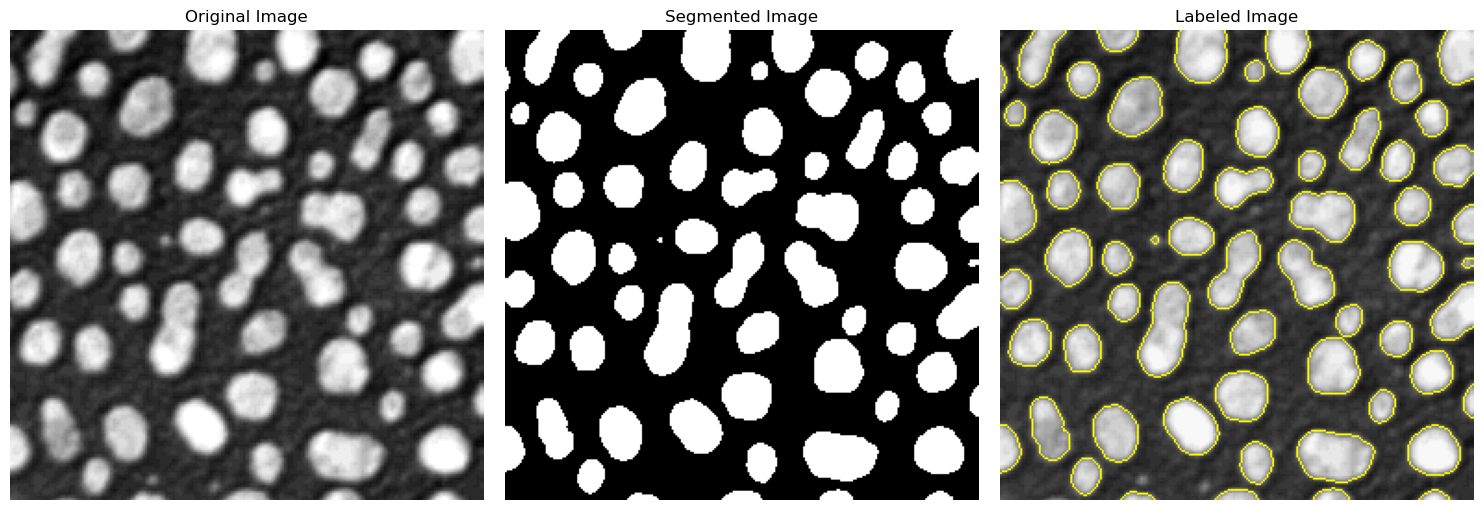

    label   area  centroid-0  centroid-1  mean_intensity
0       1  429.0   13.207459   20.006993      191.440559
1       2  183.0    4.234973   63.021858      179.846995
2       3  658.0   12.572948  108.329787      205.604863
3       4  433.0    9.782910  154.450346      217.515012
4       5  472.0   13.474576  246.868644      213.033898
..    ...    ...         ...         ...             ...
57     58  213.0  240.596244   46.028169      184.525822
58     59   79.0  251.151899  178.594937      184.810127
59     60   88.0  251.295455  127.852273      182.727273
60     61   52.0  251.538462  234.250000      189.538462
61     62   48.0  251.937500   73.666667      173.833333

[62 rows x 5 columns]


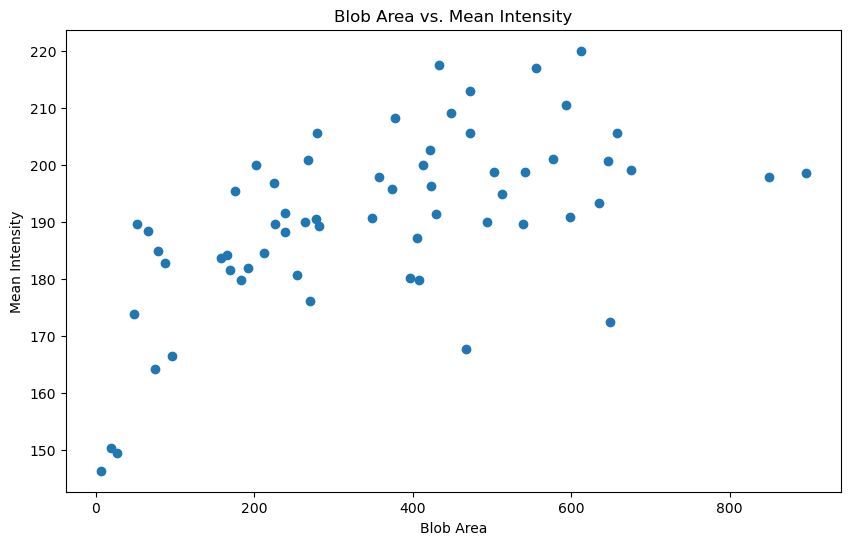

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, filters, measure, segmentation
import stackview

# Load the image
image = io.imread('blobs.tif')

# Preprocess the image with Gaussian blur
blurred = filters.gaussian(image, sigma=1)

# Segment the blobs using Otsu thresholding
threshold = filters.threshold_otsu(blurred)
binary = blurred > threshold

# Label the segmented blobs
labels = measure.label(binary)

# Measure properties of the labeled blobs
properties = ['label', 'area', 'centroid', 'mean_intensity']
blob_properties = measure.regionprops_table(labels, intensity_image=image, properties=properties)
df = pd.DataFrame(blob_properties)

# Visualize the original image, segmentation result, and labeled image side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(binary, cmap='gray')
axes[1].set_title('Segmented Image')
axes[2].imshow(segmentation.mark_boundaries(image, labels))
axes[2].set_title('Labeled Image')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Display a table with the measured properties of the blobs
print(df)

# Create a scatter plot of blob area vs. mean intensity
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['mean_intensity'])
plt.xlabel('Blob Area')
plt.ylabel('Mean Intensity')
plt.title('Blob Area vs. Mean Intensity')
plt.show()

# Interactive visualization
stackview.side_by_side(image, labels)